In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
symbol = ['M','R','L','P','V','C','I','G','A','Q','T','E','D','H','K','S','F','N','Y','W']

In [3]:
fastaTrain = open(r"/home/petamva/Msc/bioinformatics/Data mining techniques and applications in biological databases/datasets/Supp-S1.txt", "r")
fastaTest = open(r"/home/petamva/Msc/bioinformatics/Data mining techniques and applications in biological databases/datasets/Supp-A.txt", "r")

In [4]:
def getDataFromTrainFile (file):
    seq=''
    accNumber=[]
    sequences=[]
    classes=[]
    dataList = [accNumber,sequences,classes]
    for line in file:
        line=line.strip()
        x=re.search('^>',line)
        y=re.search('^[A-Z]+$',line)
        z=re.search('^\(\d',line)
        if z!=None:
            seqClass=re.findall('^\(',line)
            dataList[2].append(line)
        elif x!=None:
            accNo=re.search('\_\S{6}',line)
            dataList[0].append(accNo.group()[1:])
            if seq!='':
                dataList[1].append(seq)
                seq=''
        elif y!=None:
            seq=seq+y.string
    dataList[1].append(seq)
    return dataList

In [5]:
def getDataFromTestFile (file):
    seq=''
    accNumber=[]
    sequences=[]
    classes=[]
    dataList = [accNumber,sequences,classes]
    for line in file:
        line=line.strip()
        x=re.search('^>',line)
        y=re.search('[A-Z]{1,60}',line)
        z=re.search('^\(',line)
        if z!=None:
            seqClass=re.findall('^\(',line)
            dataList[2].append(line)
        elif x!=None:
            accNo=re.search('[^>]{6}',line)
            dataList[0].append(accNo.group())
            if seq!='':
                dataList[1].append(seq)
                seq=''
        elif y!=None:
            seq=seq+y.string
    dataList[1].append(seq)
    return dataList

In [1]:
import tensorflow as tf

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

IndexError: list index out of range

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10909249541147175014,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 150480204952736883
 physical_device_desc: "device: XLA_CPU device"]

In [6]:
trainDataset = getDataFromTrainFile(fastaTrain)
testDataset = getDataFromTestFile(fastaTest)

In [7]:
fastaTest.close
fastaTrain.close

<function TextIOWrapper.close()>

In [8]:
trainDataset[2]
testDataset[2]

['(1) 610 single-pass type I membrane proteins',
 '(2) 312 single-pass type II proteins',
 '(3) 24 single-pass type III proteins',
 '(4) 44 single-pass type IV proteins',
 '(5) 1316 multi-pass membrane proteins',
 '(6) 151 lipid-anchor membrane proteins',
 '(7) 182 Gpi-anchor membrane proteins',
 '(8) 610 peripheral membrane proteins']

In [9]:
a=np.zeros(626)
b=np.ones(299)*1
c=np.ones(42)*2
d=np.ones(73)*3
e=np.ones(2437)*4
f=np.ones(403)*5
g=np.ones(172)*6
h=np.ones(1450)*7
classes = np.concatenate([a,b,c,d,e,f,g,h],axis=0)

In [10]:
trainDf = pd.DataFrame(zip(trainDataset[0],trainDataset[1],classes),columns=['accNo','Sequence','Type'])

In [11]:
a=np.zeros(610)
b=np.ones(312)*1
c=np.ones(24)*2
d=np.ones(44)*3
e=np.ones(1316)*4
f=np.ones(151)*5
g=np.ones(182)*6
h=np.ones(610)*7
classes = np.concatenate([a,b,c,d,e,f,g,h],axis=0)

In [12]:
testDf = pd.DataFrame(zip(testDataset[0],testDataset[1],classes),columns=['accNo','Sequence','Type'])

In [13]:
trainDf['Type'] = trainDf['Type'].astype(np.int8,copy=False)
testDf['Type'] = testDf['Type'].astype(np.int8,copy=False)

In [14]:
cnt=0
for i in range(trainDf.shape[0]):
    if trainDf.loc[i,'accNo'] in testDf['accNo']:
        cnt+=1
cnt        

0

In [15]:
trainDf['Length']=trainDf['Sequence'].apply(lambda x: len(x)) 
trainDf['Length'].describe()

count     5502.000000
mean       551.655580
std        584.535975
min         50.000000
25%        269.000000
50%        428.000000
75%        661.000000
max      22152.000000
Name: Length, dtype: float64

In [16]:
testDf['Length']=testDf['Sequence'].apply(lambda x: len(x)) 
testDf['Length'].describe()

count    3249.000000
mean      522.110496
std       395.464889
min        50.000000
25%       295.000000
50%       424.000000
75%       628.000000
max      5000.000000
Name: Length, dtype: float64

In [18]:
trainDf.head()

,accNo,Sequence,Type,Length
0,A6NFA1,MHAALAGPLLAALLATARARPQPPDGGQCRPPGSQRDLNSFLWTIR...,0,517
1,A8MVS5,MPWTILLFAAGSLAIPAPSIRLVPPYPSSQEDPIHIACMAPGNFPG...,0,230
2,A8MVW5,MGQDAFMEPFGDTLGVFQCKIYLLLFGACSGLKVTVPSHTVHGVRG...,0,462
3,B0F2B4,MPAPVPALLCLALALASAQPSPPPPPPFPVVATNYGKLRGVRAALP...,0,945
4,B3LS11,MRFSMLIGFNLLTALSSFCAAISANNSDNVEHEQEVAEAVAPPSIN...,0,225


In [19]:
testDf.head()

,accNo,Sequence,Type,Length
0,P31996,MRLPVCLILLGPLIAQGTEEDCPHKKAVTLLPSFTMTPTATESTAS...,0,326
1,Q63259,MRRPRRPGGPAGCGGSEGSGGLRLLVCLLLLSGRPGGCSAISAHGC...,0,983
2,Q29435,MTPGTQSLFFLLLLLTVLTVVTGSGHASSTPGGEKETSATQRSSMP...,0,475
3,Q28634,MVPAWLWLLCFSVPQALVEVSPTTLHVEVPENYGGNFPLYLTKLPW...,0,829
4,P70106,MKSPLLGLVVWSLLLQLLQPGLAFWNSQISQNCHNGSYEITVLMMN...,0,1076


Text(0, 0.5, 'Frequency')

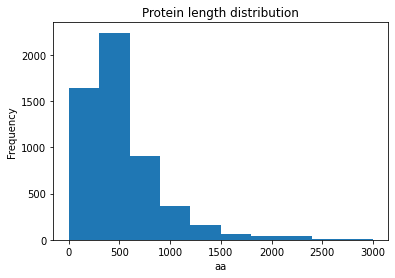

In [20]:
plt.hist(trainDf['Length'],range=[0,3000])
plt.title('Protein length distribution')
plt.xlabel('aa')
plt.ylabel('Frequency')

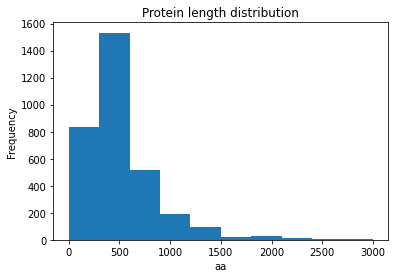

In [21]:
plt.hist(testDf['Length'],range=[0,3000])
plt.title('Protein length distribution')
plt.xlabel('aa')
plt.ylabel('Frequency')
plt.savefig('testSet.png')

In [22]:
cnt=0
for length in trainDf['Length']:
    if length<=1500:
        cnt+=1
cnt/len(trainDf['Length'])*100

96.47400945110869

In [23]:
cnt=0
for length in testDf['Length']:
    if length<=1500:
        cnt+=1
cnt/len(testDf['Length'])*100

97.56848261003385

In [17]:
condition1 = trainDf['Length']<=1500
train1500 = trainDf[condition1]
train1500 = train1500.drop(['Length','accNo'],1)
train1500 = train1500.reset_index(drop=True)
trainRows,trainCols=train1500.shape

In [18]:
cnt=0
for i in range(trainRows):
    for aa in train1500.iloc[i,0]:
        if aa == 'X' or aa== 'Z' or aa=='B'or aa=='U':
            cnt+=1
print(cnt)

16


In [19]:
condition2 = train1500['Sequence'].apply(lambda x: ('X' not in x) and ('B' not in x) and ('Z' not in x) and ('U' not in x))
train1500 = train1500[condition2]
trainRows,trainCols=train1500.shape

In [20]:
condition1 = testDf['Length']<=1500
test1500 = testDf[condition1]
test1500 = test1500.drop(['Length','accNo'],1)
test1500 = test1500.reset_index(drop=True)
testRows,testCols=test1500.shape

In [21]:
cnt=0
for i in range(testRows):
    for aa in test1500.iloc[i,0]:
        if aa == 'X' or aa== 'Z' or aa=='B':
            cnt+=1
print(cnt)

22


In [22]:
condition2 = test1500['Sequence'].apply(lambda x: ('X' not in x) and ('B' not in x) and ('Z' not in x))
test1500 = test1500[condition2]
testRows,testCols=test1500.shape

In [23]:
aminoPercentDict = {k:[0]*trainRows for k in symbol}

In [24]:
for i in range(trainRows):
     for aa in train1500.iloc[i,0]:
          aminoPercentDict[aa][i]+=1/len(train1500.iloc[i,0])

In [25]:
cnt=0
aaDic={}
for i in range(trainRows):
    for protein in train1500.iloc[i,0]:
        for aa in protein:
            if aa not in aaDic:
                aaDic[aa]=cnt
                cnt+=1

In [30]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Please install GPU version of TF


In [34]:
aminoPercent = round(pd.DataFrame(aminoPercentDict),3)

In [35]:
meanFreq = []
for col in aminoPercent.columns:
    meanFreq.append(round(aminoPercent.loc[:610,col].mean(),3))
meanFreq  

[0.019,
 0.05,
 0.1,
 0.064,
 0.068,
 0.027,
 0.047,
 0.067,
 0.068,
 0.04,
 0.064,
 0.059,
 0.047,
 0.024,
 0.045,
 0.086,
 0.037,
 0.041,
 0.03,
 0.015]

Text(0, 0.5, 'Average')

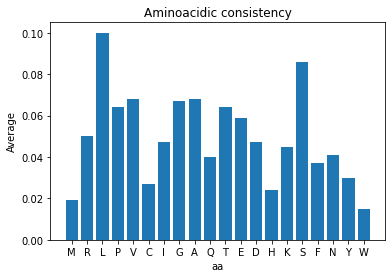

In [36]:
plt.bar(aminoPercent.columns,meanFreq)
plt.title('Aminoacidic consistency')
plt.xlabel('aa')
plt.ylabel('Average')

Text(0, 0.5, 'Mean average')

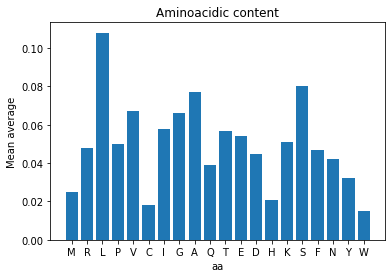

In [37]:
meanFreqAll = []
for col in aminoPercent.columns:
    meanFreqAll.append(round(aminoPercent[col].mean(),3))
meanFreqAll
plt.bar(aminoPercent.columns,meanFreqAll)
plt.title('Aminoacidic content')
plt.xlabel('aa')
plt.ylabel('Mean average')

Text(0, 0.5, 'std')

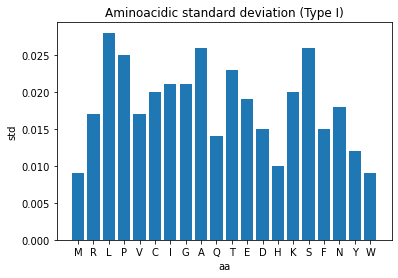

In [38]:
std = []
for col in aminoPercent.columns:
    std.append(round(aminoPercent.loc[:610,col].std(),3))
std 
plt.bar(aminoPercent.columns,std)
plt.title('Aminoacidic standard deviation (Type I)')
plt.xlabel('aa')
plt.ylabel('std')

#### one hot encoding

In [39]:
cnt=0
oneHotDic={}
for i,aa in enumerate(train1500.iloc[0,0]):
    if aa not in oneHotDic:
        oneHotDic[aa]=cnt
        cnt+=1

In [40]:
oneHotDic

{'M': 0,
 'H': 1,
 'A': 2,
 'L': 3,
 'G': 4,
 'P': 5,
 'T': 6,
 'R': 7,
 'Q': 8,
 'D': 9,
 'C': 10,
 'S': 11,
 'N': 12,
 'F': 13,
 'W': 14,
 'I': 15,
 'Y': 16,
 'V': 17,
 'K': 18,
 'E': 19}

In [41]:
trainArray = train1500.to_numpy()
np.random.seed(5)
np.random.shuffle(trainArray)
trainSequences = trainArray[:,0]
trainClasses = trainArray[:,1]
trainClasses=trainClasses.astype(np.int8)

In [42]:
testArray = test1500.to_numpy()
np.random.seed(5)
np.random.shuffle(testArray)
testSequences = testArray[:,0]
testClasses = testArray[:,1]
testClasses=testClasses.astype(np.int8)

In [43]:
trainSet = np.zeros([trainSequences.shape[0],1500,len(oneHotDic)])
for i,seq in enumerate(trainSequences):
    for j,aa in enumerate(seq):
        trainSet[i,j,oneHotDic[aa]]=1

In [44]:
testSet = np.zeros([testSequences.shape[0],1500,len(oneHotDic)])
for i,seq in enumerate(testSequences):
    for j,aa in enumerate(seq):
        testSet[i,j,oneHotDic[aa]]=1

In [ ]:
from keras.utils.np_utils import to_categorical
trainClasses = to_categorical(trainClasses,num_classes=8,dtype='int8')
testClasses = to_categorical(testClasses,num_classes=8,dtype='int8')

In [45]:
trainSeq = trainSet[:3000,:1500,:20]
valSeq = trainSet[3000:,:1500,:20]
trainClass = trainClasses[:3000,:8]
valClass = trainClasses[3000:,:8]

IndexError: too many indices for array

In [ ]:
attributes = open(r"/home/petamva/Msc/bioinformatics/Data mining techniques and applications in biological databases/datasets/aaindex1.txt", "r")

In [ ]:
aminoAttr=[]
cnt=0
for line in attributes:
    line=line.strip()
    x=re.search('^-?\d+\.\d*',line)
    if x!=None:
        cnt+=1
        attribs=re.findall('-?\d+\.\d*',line)
        aminoAttr.append(attribs)

In [ ]:
attributes.close

In [ ]:
floatList=[]
tempList=[]
for i,item in enumerate(aminoAttr):
   for j in item:
      tempList.append(float(j))
   if i%2!=0:
      floatList.append(tempList)
      tempList=[]

In [ ]:
myDf = pd.DataFrame(floatList).transpose()
rows,cols = myDf.shape
for i in range(cols):
    myDf[i].fillna(myDf[i].median(),inplace=True)

In [ ]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=18)
reducedData = pca.fit_transform(myDf)
pca.explained_variance_ratio_.sum()

In [ ]:
reducedData = preprocessing.scale(reducedData)

In [ ]:
physicoDictionary = {}
for i in range(20):
    physicoDictionary[symbol[i]]=np.around(reducedData[i,:],2)

In [ ]:
trainSetPhysico = np.zeros([trainSequences.shape[0],1500,len(physicoDictionary['M'])])
for i,seq in enumerate(trainSequences):
    for j,aa in enumerate(seq):
        trainSetPhysico[i,j]=physicoDictionary[aa]

In [ ]:
testSetPhysico = np.zeros([testSequences.shape[0],1500,len(physicoDictionary['M'])])
for i,seq in enumerate(testSequences):
    for j,aa in enumerate(seq):
        testSetPhysico[i,j]=physicoDictionary[aa]

In [ ]:
trainPhys = trainSetPhysico[:4000,:1500,:20]
valPhys = trainSetPhysico[4000:,:1500,:20]

In [ ]:
flag = True
for seq in trainSequences:
    trainRow = [0]*27000
    for i,aa in enumerate(seq):
        trainRow[18*i:18*(i+1)] = physicoDictionary[aa]
    if flag:
        trainPhysForML = trainRow
        flag=False
    else:
        trainPhysForML = np.vstack((trainPhysForML,trainRow))      

In [ ]:
flag = True
for seq in testSequences:
    testRow = [0]*27000
    for i,aa in enumerate(seq):
        testRow[18*i:18*(i+1)] = physicoDictionary[aa]
    if flag:
        testPhysForML = testRow
        flag=False
    else:
        testPhysForML = np.vstack((testPhysForML,testRow)) 

In [45]:
flag=True
for seq in trainSequences:
    trainRow=[0]*30000
    for i,aa in enumerate(seq):
        trainRow[oneHotDic[aa]+i*20] = 1
    if flag:
        trainForML = trainRow
        flag=False
    else:
        trainForML = np.vstack((trainForML,trainRow))  

In [46]:
flag=True
for seq in testSequences:
    testRow=[0]*30000
    for i,aa in enumerate(seq):
        testRow[oneHotDic[aa]+i*20] = 1
    if flag:
        testForML = testRow
        flag=False
    else:
        testForML = np.vstack((testForML,testRow))  

In [47]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [48]:
clfDT =  tree.DecisionTreeClassifier(max_depth=10,min_samples_split=2,min_samples_leaf=1)

In [49]:
clfNB = GaussianNB()

In [50]:
clfNN = KNeighborsClassifier(n_neighbors=4,weights='distance',metric='minkowski')

In [63]:
clfSVM= svm.LinearSVC(class_weight='balanced')

In [52]:
trainClasses=trainClasses.astype('int')

In [53]:
clfDT.fit(trainForML, trainClasses)

DecisionTreeClassifier(max_depth=10)

In [54]:
clfNB.fit(trainForML, trainClasses)

GaussianNB()

In [59]:
clfNN.fit(trainForML, trainClasses)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [64]:
clfSVM.fit(trainForML, trainClasses)

LinearSVC(class_weight='balanced')

In [55]:
y_test_pred_DT=clfDT.predict(testForML)

In [56]:
y_test_pred_NB=clfNB.predict(testForML)

In [60]:
y_test_pred_NN=clfNN.predict(testForML)

In [65]:
y_test_pred_SVM=clfSVM.predict(testForML)

In [57]:
precisionDT=precision_recall_fscore_support(testClasses, y_test_pred_DT, average='macro')[0]
precisionNB=precision_recall_fscore_support(testClasses, y_test_pred_NB, average='macro')[0]

In [61]:
precisionNN=precision_recall_fscore_support(testClasses, y_test_pred_NN, average='macro')[0]

In [66]:
precisionSVM=precision_recall_fscore_support(testClasses, y_test_pred_SVM, average='macro')[0]

In [67]:
precisionDT,precisionNB,precisionNN,precisionSVM

(0.3789543811102981,
 0.47515695035546834,
 0.651993849010545,
 0.7700628231061155)

In [37]:
from keras import models
from keras.layers import Flatten
from keras import layers

### Sequential model

In [154]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(1500,20)))
model.add(layers.Dense(16, activation='relu'))
model.add(Flatten())
model.add(layers.Dense(8, activation='softmax'))

In [155]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [157]:
history = model.fit(trainSeq,trainClass,
epochs=20,
batch_size=64,
validation_data=(valSeq, valClass))

Epoch 1/30
47/47 [==============================] - 1s 11ms/step - loss: 0.1684 - accuracy: 0.9610 - val_loss: 3.5144 - val_accuracy: 0.4387
Epoch 2/30
47/47 [==============================] - 0s 8ms/step - loss: 0.1539 - accuracy: 0.9607 - val_loss: 3.3919 - val_accuracy: 0.4491
Epoch 3/30
47/47 [==============================] - 0s 8ms/step - loss: 0.1602 - accuracy: 0.9583 - val_loss: 3.2882 - val_accuracy: 0.4891
Epoch 4/30
47/47 [==============================] - 0s 8ms/step - loss: 0.1396 - accuracy: 0.9607 - val_loss: 3.0488 - val_accuracy: 0.5022
Epoch 5/30
47/47 [==============================] - 0s 8ms/step - loss: 0.1440 - accuracy: 0.9603 - val_loss: 3.0244 - val_accuracy: 0.5004
Epoch 6/30
47/47 [==============================] - 0s 8ms/step - loss: 0.1311 - accuracy: 0.9603 - val_loss: 3.2105 - val_accuracy: 0.5122
Epoch 7/30
47/47 [==============================] - 0s 8ms/step - loss: 0.1378 - accuracy: 0.9577 - val_loss: 3.2486 - val_accuracy: 0.5070
Epoch 8/30
47/47 [=

In [55]:
model.evaluate(testSet,testClasses)

99/99 [==============================] - 0s 2ms/step - loss: 1.8212 - accuracy: 0.6352


[1.8212352991104126, 0.6352121829986572]

### Convnet 1D

In [91]:
model = models.Sequential()
model.add(layers.Conv1D(128, (15), activation='relu',
input_shape=(1500,20)))
model.add(layers.MaxPooling1D((2)))
model.add(layers.Conv1D(64, (5), activation='relu'))
model.add(layers.MaxPooling1D((2)))
model.add(layers.Conv1D(32, (2), activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(8, activation='softmax'))

In [92]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [95]:
history = model.fit(trainSeq,trainClass,
epochs=20,
batch_size=64,
validation_data=(valSeq, valClass))

Epoch 1/20
47/47 [==============================] - 1s 20ms/step - loss: 0.2684 - accuracy: 0.9057 - val_loss: 1.1395 - val_accuracy: 0.7343
Epoch 2/20
47/47 [==============================] - 1s 17ms/step - loss: 0.2435 - accuracy: 0.9100 - val_loss: 1.3059 - val_accuracy: 0.7265
Epoch 3/20
47/47 [==============================] - 1s 17ms/step - loss: 0.2321 - accuracy: 0.9257 - val_loss: 1.2192 - val_accuracy: 0.7457
Epoch 4/20
47/47 [==============================] - 1s 17ms/step - loss: 0.1690 - accuracy: 0.9377 - val_loss: 1.4534 - val_accuracy: 0.7378
Epoch 5/20
47/47 [==============================] - 1s 17ms/step - loss: 0.1803 - accuracy: 0.9370 - val_loss: 1.4274 - val_accuracy: 0.7378
Epoch 6/20
47/47 [==============================] - 1s 17ms/step - loss: 0.1725 - accuracy: 0.9427 - val_loss: 1.4878 - val_accuracy: 0.7196
Epoch 7/20
47/47 [==============================] - 1s 17ms/step - loss: 0.1737 - accuracy: 0.9370 - val_loss: 1.3585 - val_accuracy: 0.7391
Epoch 8/20
47

In [96]:
model.evaluate(testSet,testClasses)

99/99 [==============================] - 0s 4ms/step - loss: 0.9881 - accuracy: 0.7809


[0.9880755543708801, 0.7808739542961121]

### LSTM

model = models.Sequential()
model.add(layers.Conv1D(128, (15),strides=10, activation='relu',
input_shape=(1500,20)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D((2)))
model.add(layers.Bidirectional(layers.LSTM(64,return_sequences=True,dropout=0.3)))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(64))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(8, activation='softmax'))

In [150]:
model = models.Sequential()
model.add(layers.Conv1D(128, (15),strides=10, activation='relu',
input_shape=(1500,20)))
model.add(layers.MaxPooling1D((2)))
model.add(layers.LSTM(64))
model.add(layers.Flatten())
model.add(layers.Dense(8, activation='softmax'))

In [151]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [152]:
history = model.fit(trainSeq,trainClass,
epochs=20,
batch_size=64,
validation_data=(valSeq, valClass))

Epoch 1/20
47/47 [==============================] - 1s 17ms/step - loss: 1.5915 - accuracy: 0.4377 - val_loss: 1.4856 - val_accuracy: 0.4565
Epoch 2/20
47/47 [==============================] - 1s 11ms/step - loss: 1.5144 - accuracy: 0.4543 - val_loss: 1.4698 - val_accuracy: 0.4600
Epoch 3/20
47/47 [==============================] - 0s 11ms/step - loss: 1.4956 - accuracy: 0.4690 - val_loss: 1.4216 - val_accuracy: 0.5165
Epoch 4/20
47/47 [==============================] - 1s 11ms/step - loss: 1.4087 - accuracy: 0.4973 - val_loss: 1.4115 - val_accuracy: 0.4661
Epoch 5/20
47/47 [==============================] - 1s 11ms/step - loss: 1.3166 - accuracy: 0.5517 - val_loss: 1.2506 - val_accuracy: 0.5861
Epoch 6/20
47/47 [==============================] - 0s 11ms/step - loss: 1.2752 - accuracy: 0.5783 - val_loss: 1.1648 - val_accuracy: 0.6261
Epoch 7/20
47/47 [==============================] - 1s 11ms/step - loss: 1.1984 - accuracy: 0.5953 - val_loss: 1.0843 - val_accuracy: 0.6443
Epoch 8/20
47

In [153]:
model.evaluate(testSet,testClasses)

99/99 [==============================] - 0s 3ms/step - loss: 1.0115 - accuracy: 0.6735


[1.011452317237854, 0.6735275387763977]

### Convnet 2D

In [46]:
trainConvnet = trainSeq.reshape(4000,1500,20,1)
valConvnet = valSeq.reshape(1300,1500,20,1)
testConvnet = testSet.reshape(3158,1500,20,1)

In [69]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3), activation='relu',
input_shape=(1500,20,1)))
model.add(layers.MaxPooling2D((2)))
model.add(layers.Conv2D(32, (3), activation='relu'))
model.add(layers.MaxPooling2D((2)))
model.add(layers.Conv2D(32, (2), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(8, activation='softmax'))

In [70]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [71]:
history = model.fit(trainConvnet,trainClass,
epochs=10,
batch_size=32,
validation_data=(valConvnet, valClass))

Epoch 1/10
125/125 [==============================] - 2s 15ms/step - loss: 1.3805 - accuracy: 0.5010 - val_loss: 1.1447 - val_accuracy: 0.5846
Epoch 2/10
125/125 [==============================] - 2s 13ms/step - loss: 1.0431 - accuracy: 0.6407 - val_loss: 1.0415 - val_accuracy: 0.6400
Epoch 3/10
125/125 [==============================] - 2s 13ms/step - loss: 0.8896 - accuracy: 0.6883 - val_loss: 0.9953 - val_accuracy: 0.6723
Epoch 4/10
125/125 [==============================] - 2s 13ms/step - loss: 0.7584 - accuracy: 0.7343 - val_loss: 1.0496 - val_accuracy: 0.6723
Epoch 5/10
125/125 [==============================] - 2s 13ms/step - loss: 0.6512 - accuracy: 0.7713 - val_loss: 1.1257 - val_accuracy: 0.6585
Epoch 6/10
125/125 [==============================] - 2s 13ms/step - loss: 0.5565 - accuracy: 0.8030 - val_loss: 1.1551 - val_accuracy: 0.6369
Epoch 7/10
125/125 [==============================] - 2s 13ms/step - loss: 0.4749 - accuracy: 0.8335 - val_loss: 1.2795 - val_accuracy: 0.6377

In [72]:
model.evaluate(testConvnet,testClasses)

99/99 [==============================] - 1s 5ms/step - loss: 0.9450 - accuracy: 0.7600


[0.945026695728302, 0.7599746584892273]

### Wavenet

In [132]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(1500,20)))
for rate in (1, 2, 4, 8):
    model.add(layers.Conv1D(64, (15),
    padding="causal",activation="relu", dilation_rate=rate))
model.add(layers.Conv1D(64,(2)))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(8, activation='softmax'))

In [133]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [134]:
history = model.fit(trainSeq,trainClass,
epochs=20,
batch_size=64,
validation_data=(valSeq, valClass))

Epoch 1/20
47/47 [==============================] - 3s 54ms/step - loss: 24.9410 - accuracy: 0.3580 - val_loss: 7.1550 - val_accuracy: 0.0543
Epoch 2/20
47/47 [==============================] - 2s 49ms/step - loss: 2.9188 - accuracy: 0.5680 - val_loss: 19.0983 - val_accuracy: 0.0691
Epoch 3/20
47/47 [==============================] - 2s 49ms/step - loss: 6.8046 - accuracy: 0.5923 - val_loss: 6.3711 - val_accuracy: 0.1922
Epoch 4/20
47/47 [==============================] - 2s 49ms/step - loss: 1.8697 - accuracy: 0.6970 - val_loss: 25.5532 - val_accuracy: 0.0691
Epoch 5/20
47/47 [==============================] - 2s 49ms/step - loss: 1.5832 - accuracy: 0.7693 - val_loss: 38.3019 - val_accuracy: 0.2600
Epoch 6/20
29/47 [=================>............] - ETA: 0s - loss: 0.7757 - accuracy: 0.8615

KeyboardInterrupt: 

In [128]:
model.evaluate(testSet,testClasses)

99/99 [==============================] - 1s 7ms/step - loss: 0.7151 - accuracy: 0.8448


[0.7151454091072083, 0.8448385000228882]

### Physicochemical attributes

In [75]:
attributes = open(r"/home/petamva/Msc/bioinformatics/Data mining techniques and applications in biological databases/datasets/aaindex1.txt", "r")

In [76]:
aminoAttr=[]
cnt=0
for line in attributes:
    line=line.strip()
    x=re.search('^-?\d+\.\d*',line)
    if x!=None:
        cnt+=1
        attribs=re.findall('-?\d+\.\d*',line)
        aminoAttr.append(attribs)

In [78]:
attributes.close

<function TextIOWrapper.close()>

In [79]:
floatList=[]
tempList=[]
for i,item in enumerate(aminoAttr):
   for j in item:
      tempList.append(float(j))
   if i%2!=0:
      floatList.append(tempList)
      tempList=[]

In [116]:
myDf = pd.DataFrame(floatList).transpose()
rows,cols = myDf.shape
for i in range(cols):
    myDf[i].fillna(myDf[i].median(),inplace=True)

In [82]:
from sklearn import preprocessing

myDf = preprocessing.scale(myDf)

In [84]:
from sklearn.decomposition import PCA

In [117]:
pca = PCA(n_components=18)
reducedData = pca.fit_transform(myDf)
pca.explained_variance_ratio_.sum()

0.9997220511815375

In [118]:
reducedData = preprocessing.scale(reducedData)

In [119]:
physicoDictionary = {}
for i in range(20):
    physicoDictionary[symbol[i]]=np.around(reducedData[i,:],2)

In [120]:
trainSetPhysico = np.zeros([trainSequences.shape[0],1500,len(physicoDictionary['M'])])
for i,seq in enumerate(trainSequences):
    for j,aa in enumerate(seq):
        trainSetPhysico[i,j]=physicoDictionary[aa]

In [121]:
testSetPhysico = np.zeros([testSequences.shape[0],1500,len(physicoDictionary['M'])])
for i,seq in enumerate(testSequences):
    for j,aa in enumerate(seq):
        testSetPhysico[i,j]=physicoDictionary[aa]

In [122]:
trainPhys = trainSetPhysico[:4000,:1500,:20]
valPhys = trainSetPhysico[4000:,:1500,:20]

### Sequential (physico)

In [124]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(1500,18)))
model.add(layers.Dense(16, activation='relu'))
model.add(Flatten())
model.add(layers.Dense(8, activation='softmax'))

In [125]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [126]:
history = model.fit(trainPhys,trainClass,
epochs=10,
batch_size=64,
validation_data=(valPhys, valClass))

Epoch 1/10
63/63 [==============================] - 0s 7ms/step - loss: 1.8353 - accuracy: 0.4193 - val_loss: 1.5246 - val_accuracy: 0.4715
Epoch 2/10
63/63 [==============================] - 0s 5ms/step - loss: 1.0601 - accuracy: 0.6175 - val_loss: 1.2064 - val_accuracy: 0.5838
Epoch 3/10
63/63 [==============================] - 0s 5ms/step - loss: 0.6546 - accuracy: 0.7828 - val_loss: 1.2927 - val_accuracy: 0.5969
Epoch 4/10
63/63 [==============================] - 0s 5ms/step - loss: 0.4280 - accuracy: 0.8745 - val_loss: 1.5404 - val_accuracy: 0.5723
Epoch 5/10
63/63 [==============================] - 0s 5ms/step - loss: 0.3087 - accuracy: 0.9190 - val_loss: 1.6356 - val_accuracy: 0.5923
Epoch 6/10
63/63 [==============================] - 0s 5ms/step - loss: 0.2505 - accuracy: 0.9400 - val_loss: 1.7798 - val_accuracy: 0.5846
Epoch 7/10
63/63 [==============================] - 0s 5ms/step - loss: 0.2134 - accuracy: 0.9467 - val_loss: 1.8532 - val_accuracy: 0.5831
Epoch 8/10
63/63 [==

In [127]:
model.evaluate(testSetPhysico,testClasses)

99/99 [==============================] - 0s 2ms/step - loss: 1.3582 - accuracy: 0.6742


[1.3581947088241577, 0.6741608381271362]

### Convnet (physico)

In [128]:
trainConvnetPhys = trainPhys.reshape(4000,1500,18,1)
valConvnetPhys = valPhys.reshape(1300,1500,18,1)
testConvnetPhys = testSetPhysico.reshape(3158,1500,18,1)

In [129]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3), activation='relu',
input_shape=(1500,18,1)))
model.add(layers.MaxPooling2D((2)))
model.add(layers.Conv2D(32, (3), activation='relu'))
model.add(layers.MaxPooling2D((2)))
model.add(layers.Conv2D(32, (2), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(8, activation='softmax'))

In [130]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [131]:
history = model.fit(trainConvnetPhys,trainClass,
epochs=10,
batch_size=32,
validation_data=(valConvnetPhys, valClass))

Epoch 1/10
125/125 [==============================] - 2s 15ms/step - loss: 1.5254 - accuracy: 0.4647 - val_loss: 1.2563 - val_accuracy: 0.5915
Epoch 2/10
125/125 [==============================] - 2s 12ms/step - loss: 1.1292 - accuracy: 0.6102 - val_loss: 0.9748 - val_accuracy: 0.6700
Epoch 3/10
125/125 [==============================] - 2s 13ms/step - loss: 0.9057 - accuracy: 0.6900 - val_loss: 0.8956 - val_accuracy: 0.7131
Epoch 4/10
125/125 [==============================] - 2s 13ms/step - loss: 0.7686 - accuracy: 0.7393 - val_loss: 0.9255 - val_accuracy: 0.7262
Epoch 5/10
125/125 [==============================] - 2s 13ms/step - loss: 0.6514 - accuracy: 0.7742 - val_loss: 1.0284 - val_accuracy: 0.7062
Epoch 6/10
125/125 [==============================] - 2s 13ms/step - loss: 0.5503 - accuracy: 0.8040 - val_loss: 0.9598 - val_accuracy: 0.7169
Epoch 7/10
125/125 [==============================] - 2s 13ms/step - loss: 0.4660 - accuracy: 0.8350 - val_loss: 0.9869 - val_accuracy: 0.7146

In [132]:
model.evaluate(testConvnetPhys,testClasses)

99/99 [==============================] - 1s 5ms/step - loss: 0.9162 - accuracy: 0.7726


[0.9162042737007141, 0.7726408839225769]

### Wavenet

In [133]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(1500,18)))
for rate in (1, 2, 4, 8) * 2:
    model.add(layers.Conv1D(32, (2),
    padding="causal",activation="relu", dilation_rate=rate))
model.add(layers.Conv1D(64,(1)))
#model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(8, activation='softmax'))

In [134]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [135]:
history = model.fit(trainPhys,trainClass,
epochs=10,
batch_size=64,
validation_data=(valPhys, valClass))

Epoch 1/10
63/63 [==============================] - 2s 25ms/step - loss: 1.5677 - accuracy: 0.4322 - val_loss: 1.4305 - val_accuracy: 0.4669
Epoch 2/10
63/63 [==============================] - 1s 22ms/step - loss: 1.3417 - accuracy: 0.5055 - val_loss: 0.9952 - val_accuracy: 0.6900
Epoch 3/10
63/63 [==============================] - 1s 22ms/step - loss: 1.0188 - accuracy: 0.6665 - val_loss: 0.8487 - val_accuracy: 0.7492
Epoch 4/10
63/63 [==============================] - 1s 22ms/step - loss: 0.8970 - accuracy: 0.7007 - val_loss: 0.8119 - val_accuracy: 0.7285
Epoch 5/10
63/63 [==============================] - 1s 22ms/step - loss: 0.8344 - accuracy: 0.7195 - val_loss: 0.7800 - val_accuracy: 0.7623
Epoch 6/10
63/63 [==============================] - 1s 22ms/step - loss: 0.7598 - accuracy: 0.7500 - val_loss: 0.7954 - val_accuracy: 0.7531
Epoch 7/10
63/63 [==============================] - 1s 22ms/step - loss: 0.7046 - accuracy: 0.7623 - val_loss: 0.8012 - val_accuracy: 0.7592
Epoch 8/10
63

In [136]:
model.evaluate(testSetPhysico,testClasses)

99/99 [==============================] - 1s 5ms/step - loss: 0.7071 - accuracy: 0.7717


[0.707149088382721, 0.7716909646987915]